# PyMaceuticals Challenge


### Set Up & Merge Datasets

In [119]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from IPython.display import display
from scipy.stats import linregress
import seaborn as sn

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_df= pd.read_csv(mouse_metadata_path)
study_df = pd.read_csv(study_results_path)


In [2]:
# Display first five results
mouse_df.head() 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# Combine the data into a single dataset.  
mouse_metadata_df = pd.merge(mouse_df, study_df, how="outer", on=["Mouse ID", "Mouse ID"]) 

# Display first five records 
mouse_metadata_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


### Clean Data

In [4]:
# Step 1: Check the number of mice.
number_mice = mouse_metadata_df['Mouse ID'].nunique() 

print(f'Number of mice: {number_mice}') 

Number of mice: 249


In [5]:
# Step 2: Create a clean DataFrame by dropping the duplicate mouse by its ID AND Timepoint.
df = mouse_metadata_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], ignore_index=True)

# Confirm duplicates were dropped 
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Step 3: Verify dataframe is clean by comparing to original 

# Number of rows original merged dataframe
original_merged_df = mouse_metadata_df.shape[0]

# Number of rows of cleaned dataframe 
cleaned_df = len(df)

print(f'Prior to cleaning the data we had {original_merged_df} rows of data.')  
print(f'After dropping duplicates, the clean dataset shows {cleaned_df} rows of data.') 

Prior to cleaning the data we had 1893 rows of data.
After dropping duplicates, the clean dataset shows 1888 rows of data.


## Summary Statistics
* Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
 

In [7]:
# Step 1: Group data by 'Drug Regimen'
grouped_drugs = df.groupby("Drug Regimen")

# Step 2: Find Mean, Median, Variance, std and Sem
summary_stats = grouped_drugs.agg({"Tumor Volume (mm3)": ['mean','median', 'var', 'std', 'sem']}) 

summary_stats.head() 



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

## Bar Charts

#### Create bar plots showing the total number of measurements taken for each treatment regimen using Pandas 


Text(0, 0.5, 'Tumor Volume (mm3)')

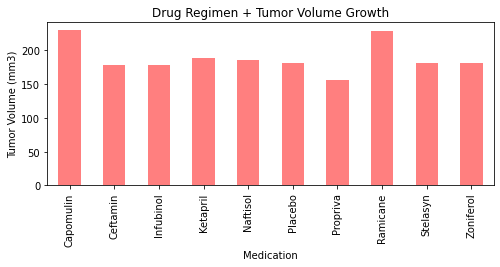

In [109]:
# Method 1: Plot using Pandas
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

total_measurements = df.groupby("Drug Regimen").count()["Mouse ID"] 

total_measurements.plot(kind="bar", color = 'r', alpha=0.5, figsize=(8,3)) 

# Give our chart some labels and a tile
plt.title("Drug Regimen + Tumor Volume Growth")
plt.xlabel("Medication")
plt.ylabel("Tumor Volume (mm3)")


#### Create bar plots showing the total number of measurements taken for each treatment regimen using Pyplot

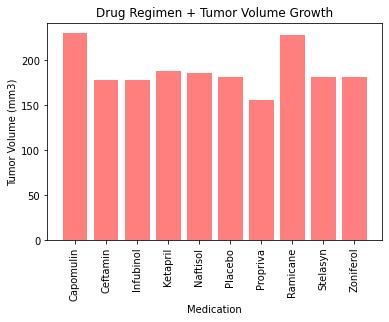

In [111]:
# Method 2: Plot using Matplotlib 
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

plt.bar(total_measurements.index.values, total_measurements.values, color ='r', alpha=0.5)

# Give our chart some labels and a tile
plt.title("Drug Regimen + Tumor Volume Growth")
plt.xlabel("Medication")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks(rotation=90)
plt.show() 

## Pie Charts

<AxesSubplot:ylabel='Mouse ID'>

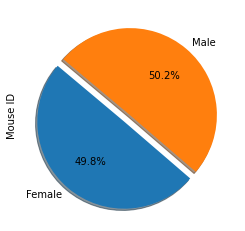

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_distribution = df.groupby("Sex").nunique()["Mouse ID"]
explode = (0.1, 0)

gender_distribution.plot(kind="pie", shadow=True, explode=explode, startangle=140, autopct="%1.1f%%") 


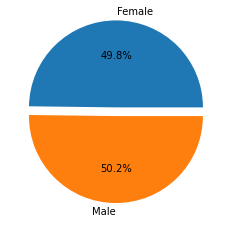

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

explode = (0.1, 0)
autopct =("%1.1f%%") 


plt.pie(gender_distribution.values, labels=gender_distribution.index.values, explode=explode, autopct=autopct)
plt.show() 




## Quartiles, Outliers and Boxplots

### Instructions:
* Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. 
* Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.


* Start by getting the last (greatest) timepoint for each mouse
* Merge this group df with the original dataframe to get the tumor volume at the last timepoint

### Calculate the IQR and quantitatively determine if there are any potential outliers.

In [74]:
# Step 1: Exploring potential Outliers --> use mean, median or mode? 

print(f'To look at potential outliers, examine mode, mean and median.') 

print(f'Tumor Volume (mm3) values are continuous so mode is not appropriate.')

print(f'To determine whether mean or median is more approprate, create a histogram') 

To look at potential outliers, examine mode, mean and median.
Tumor Volume (mm3) values are continuous so mode is not appropriate.
To determine whether mean or median is more approprate, create a histogram


NormaltestResult(statistic=20.51500322122412, pvalue=3.509325502065816e-05)
The Histogram shows that data is not normally distributed so median is a more interpretable statistic.


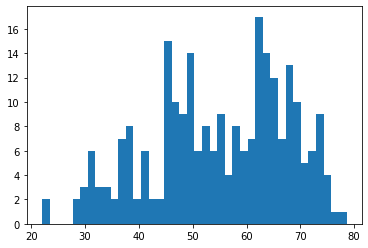

In [75]:
# Step 2: Create a histogram
plt.hist(tumor_volumes["Tumor Volume (mm3)"],bins=40) 

print(st.normaltest(tumor_volumes["Tumor Volume (mm3)"])) 

print(f'The Histogram shows that data is not normally distributed so median is a more interpretable statistic.')

In [76]:
# Step 3: Find last timepoint for each mouse

max_tp_df = pd.DataFrame(df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
max_tp_df

# Step 4: Merge max timepoint onto data_df
merged_df = pd.merge(df, max_tp_df, on='Mouse ID')
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [77]:
# Step 5: Create containers and conditionals for for loop
drug = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_values = []

# Step 6: Locate each drug from our list 'drugs' in the orginal dataframe
for drug in drugs:
    
    temp_df = merged_df.loc[merged_df['Drug Regimen'] == drug]

    # Create subset dataframes that narrow down to rows only containing the final timepoint for each regimen
    final_timepoint_df = temp_df.loc[temp_df['Timepoint'] == temp_df['max_timepoint']] 
    
    # Create a series that consists of all final volume values for each regimen
    values = final_timepoint_df['Tumor Volume (mm3)']
    drug_values.append(values)
    
    # Calculate and print the interquartile range (IQR) for each regimen
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    
    # Find upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
    # Quantitatively check for outliers
    outliers_count = (values.loc[(final_timepoint_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_timepoint_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers_count}')

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


In [78]:
# Step 7: Find the Infubinol outlier

infubinol = tumor_volumes.loc[(tumor_volumes["Drug Regimen"]) == "Infubinol"] 

min_infubinol = infubinol["Tumor Volume (mm3)"].min() 
max_infubinol = infubinol["Tumor Volume (mm3)"].max() 

infubinol_outlier = infubinol[infubinol['Tumor Volume (mm3)'] == min_infubinol]


### Generate a box and whisker plot of the final tumor volume for all four treatment regimens
    * Highlight any potential outliers in the plot by changing their color and style
    * Ensure all four box plots should be within the same figure

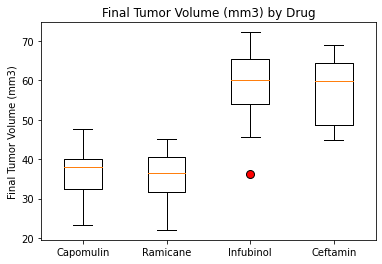

In [79]:

# Make outlier more visible
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

# Create Boxplot
plt.boxplot(drug_values, flierprops=flierprops)

# Add Label
plt.title('Final Tumor Volume (mm3) by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1,2,3,4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']) 
plt.show() 



## Line and Scatter Plots

### Generate a scatter plot with a linear regression model of mouse weight versus average tumor volume for the Capomulin treatment regimen. 


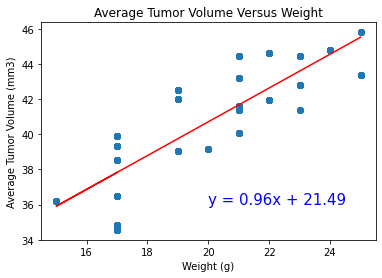

The r-squared is: 0.6962164535925288
The linear equation is: y = 0.96x + 21.49


In [136]:
# Step 1: Create a Boolean Mask to separate each drug 
capomulin_subset = df.loc[(df["Drug Regimen"]) == "Capomulin"]

# Step 2: Find average tumor volume for each mouse

avg_tumor_df = pd.DataFrame(capomulin_subset.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values(ascending=False)).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_tumor_df.head()

# Step 3: Merge average tumor volume onto 'capomulin' and drop duplicates
capomulin_df  = pd.merge(capomulin_subset, avg_tumor_df, on='Mouse ID')
capomulin_df

# Step 4: Define X and Y axis values

x_values = capomulin_df['Weight (g)']
y_values = capomulin_df['avg_tumor_vol']

# Step 5: Calculate Linear Regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Step 6: Plot linear regression on top of scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")

# Step 7: Annotate linear regression
plt.annotate(line_eq,(20,36),fontsize=15,color="blue")

# Step 8: Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume Versus Weight')

# Display plot, R-Squared value and Linear Equation
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(f"The linear equation is: {line_eq}") 

## Correlation and Regression

 ### Calculate the correlation coefficient 

The correlation is very strong between mouse weight and average tumor volume at 0.83
AxesSubplot(0.125,0.125;0.62x0.755)


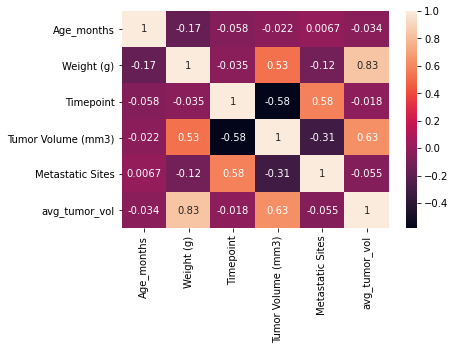

In [141]:
# Step 1: Use iloc to extract columns
mouse_weight = capomulin_df.iloc[:,4]
average_tumor_volume = capomulin_df.iloc[:,8]

# Step 2: Calculate Pearsons correlation coefficient
correlation = st.pearsonr(mouse_weight,average_tumor_volume)
print(f"The correlation is very strong between mouse weight and average tumor volume at {round(correlation[0],2)}")

# Step 3: Verify correlation coefficient using a correlation matrix
capomulin_corr = capomulin_df.corr()
capomulin_corr.unstack().sort_values()

print(sn.heatmap(capomulin_corr, annot=True))
plt.show()